In [534]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import math
import keyboard
from IPython.display import clear_output

In [86]:
k=0.2/10*np.log(10)

In [2]:
def prob_all(n,p):
    truth_vals = [False for _ in range(n)]
    counter = 0
    while not all(truth_vals):
        counter += 1
        for i,b in enumerate(truth_vals):
            if not b:
                if random.random() < p:
                    truth_vals[i] = True
    return counter

In [5]:
def it(i,n,p):
    l = []
    for i in range(i):
        l.append(prob_all(n,p))

    return l

# n is number of dice/sublinks
# p is probability of success
# i is number of iterations/trials

In [6]:
# Z_n is the mean number of iterations until all sublinks are generated 
def Z(p,N):
    sol_ = 0
    for j in range(1,N+1):
        term = math.comb(N,j) * (-1)**(j+1) / (1 - (1-p)**j)
        sol_ += term
    return sol_

def exp_subl(L,N):
    return Z(np.exp(-k*L/N),N)

In [7]:
def prob_all_SaE_naive(n,p,q): # naive: if one swapping fails, all break
    truth_vals = [False for _ in range(n)]
    counter = 0
    while not all(truth_vals):
        counter += 1
        for i,b in enumerate(truth_vals):
            if not b:
                if random.random() < p:
                    truth_vals[i] = True
        if all(truth_vals):
            if random.random() < q**(n-1):
                return counter
            else:
                truth_vals = [False for _ in range(n)]
def it_SaE_naive(i,n,p,q):
    l = []
    for i in range(i):
        l.append(prob_all_SaE_naive(n,p,q))
    return l

In [8]:
def it_SaE_2(i,p,q):
    l = []
    for i in range(i):
        l.append(prob_all_SaE_naive(2,p,q))
    return l

In [9]:
def prob_all_SaE_3(p,q):
    truth_vals = [False for _ in range(3)]
    counter = 0
    while not all(truth_vals):
        counter += 1
        for i,b in enumerate(truth_vals):
            if not b:
                if random.random() < p:
                    truth_vals[i] = True
        if all(truth_vals):
            if random.random() < q:
                if random.random() < q:
                    return counter
                else:
                    truth_vals[1] = False
                    truth_vals[2] = False
            else:
                truth_vals[0] = False
                truth_vals[1] = False
                
def it_SaE_3(i,p,q):
    l = []
    for i in range(i):
        l.append(prob_all_SaE_3(p,q))
    return l

In [10]:
def prob_all_SaE_4(p,q):
    truth_vals = [False for _ in range(4)]
    counter = 0
    while not all(truth_vals):
        counter += 1
        for i,b in enumerate(truth_vals):
            if not b:
                if random.random() < p:
                    truth_vals[i] = True
        if all(truth_vals):
            if random.random() < q:
                print('--o--?--?--')
                if random.random() < q:
                    print('--o--?--o--')
                    if random.random() < q:
                        print('--o--o--o--')
                        return counter
                    else:
                        print('--o--x--o--')
                        truth_vals = [False for _ in range(4)]
                else:
                    print('--o--?--x--')
                    truth_vals[2] = False
                    truth_vals[3] = False
            else:
                print('--x--?--?--')
                truth_vals[0] = False
                truth_vals[1] = False
                
def it_SaE_4(i,p,q):
    l = []
    for i in range(i):
        l.append(prob_all_SaE_4(p,q))
    return l

## Basic graphs

### q=1, varying N with different L

In [65]:
N_values = range(1,20)

dict_L = {}
for L in np.arange(50, 250, 50):
    dict_L[L] = [np.mean(it(i=1000,n=N,p=np.exp(-k*L/N))) for N in N_values]

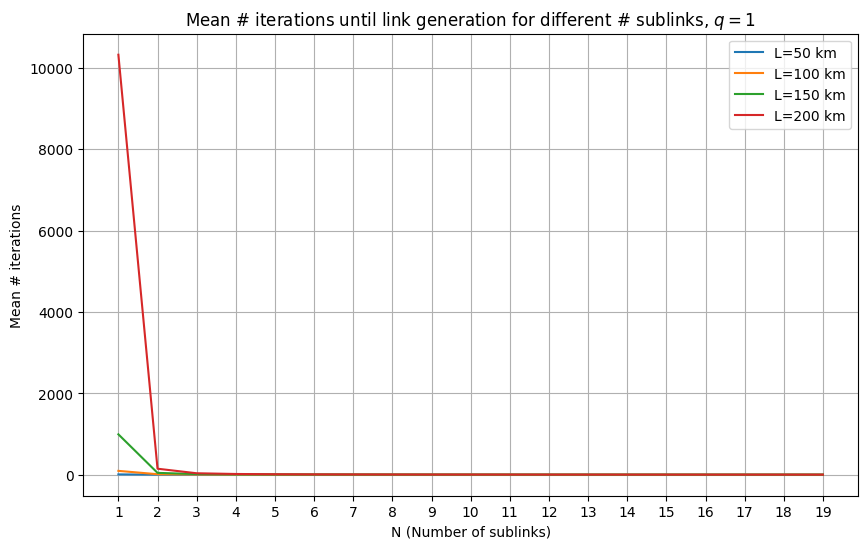

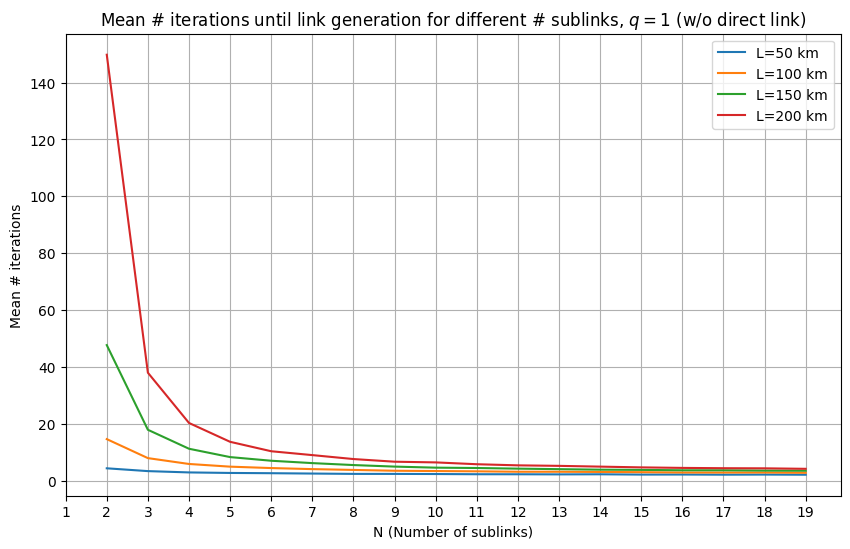

In [66]:
N_ticks = range(math.floor(min(N_values)), math.ceil(max(N_values))+1)


plt.figure(figsize=(10, 6))
for key in dict_L:
    plt.plot(N_values, dict_L[key], label=f'L={key} km')
plt.xticks(N_ticks)
plt.xlabel('N (Number of sublinks)')
plt.ylabel('Mean # iterations')
plt.title('Mean # iterations until link generation for different # sublinks, $q=1$')
plt.grid(True)
plt.legend()
plt.show()


plt.figure(figsize=(10, 6))
for key in dict_L:
    plt.plot(N_values[1:], dict_L[key][1:], label=f'L={key} km')
plt.xticks(N_ticks)
plt.xlabel('N (Number of sublinks)')
plt.ylabel('Mean # iterations')
plt.title('Mean # iterations until link generation for different # sublinks, $q=1$ (w/o direct link)')
plt.grid(True)
plt.legend()
plt.show()

### q=1, varying L with different N

In [67]:
L_values = np.arange(1,251)

dict_L = {}
dict_L[1] = [np.mean(it(i=1000,n=1,p=np.exp(-k*L/1))) for L in L_values]

KeyboardInterrupt: 

In [ ]:
L_values = np.arange(1,251)

for sl in range(2,7):
    print(f'{sl} done!')
    dict_L[sl] = [np.mean(it(i=5000,n=sl,p=np.exp(-k*L/sl))) for L in L_values]

2 done!
3 done!
4 done!
5 done!
6 done!


In [ ]:
exp_graphs = {}
for n in range(1,6+1):
    exp_graphs[n] = [exp_subl(L,n) for L in L_values]


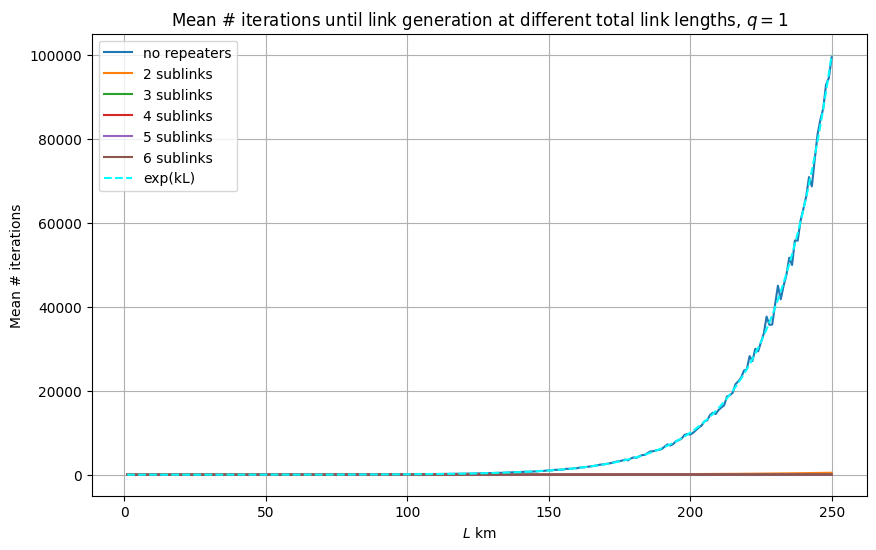

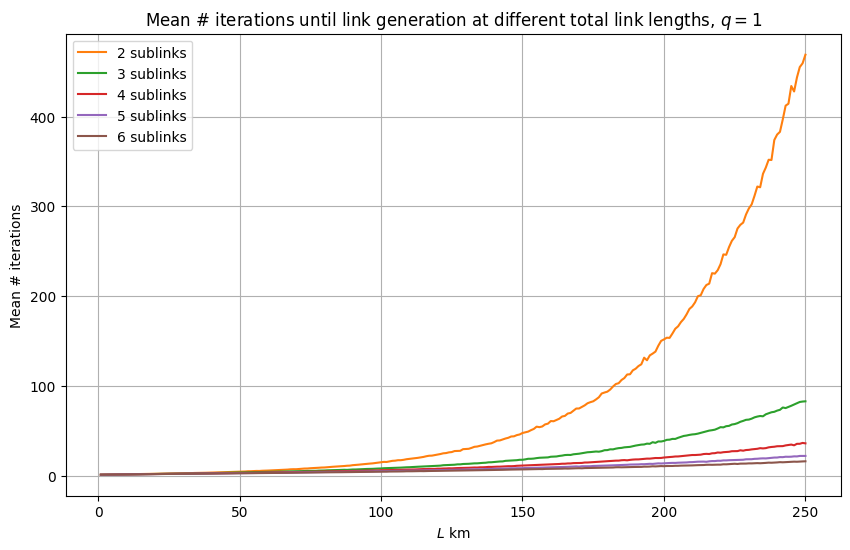

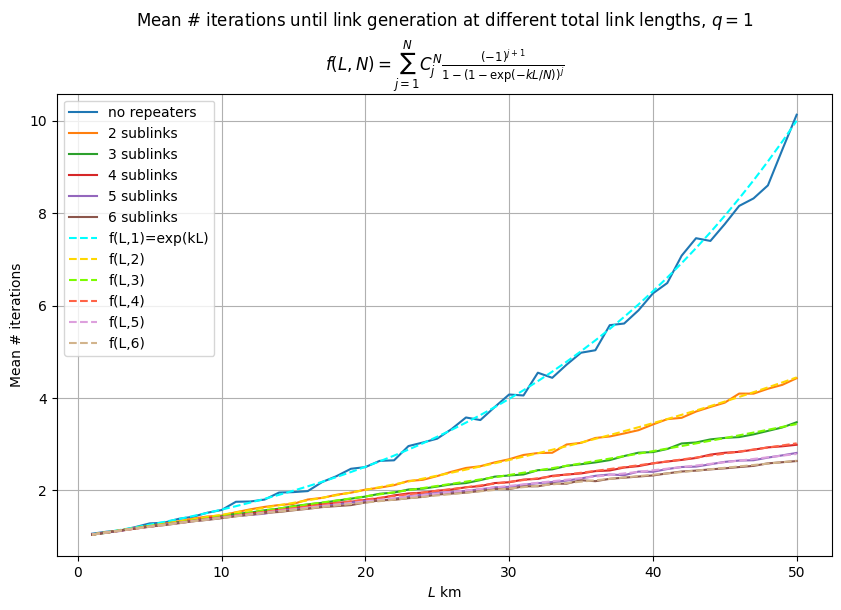

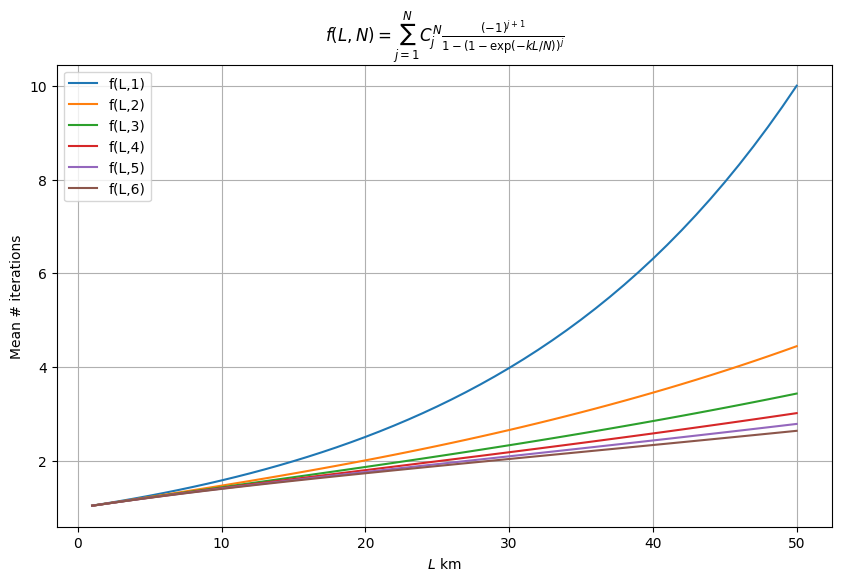

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(L_values, dict_L[1], label='no repeaters')
for key in dict_L:
    if key != 1:
        plt.plot(L_values, dict_L[key], label=f'{key} sublinks')

plt.plot(L_values, exp_graphs[1], label='exp(kL)', color='cyan',linestyle='--')
plt.xlabel('$L$ km')
plt.ylabel('Mean # iterations')
plt.title('Mean # iterations until link generation at different total link lengths, $q=1$')
plt.grid(True)
plt.legend()
plt.show()


dotted_colors = ['','cyan','gold','lawngreen','tomato','plum','tan']


plt.figure(figsize=(10, 6))
plt.plot([],[])
for key in dict_L:
    if key != 1:
        plt.plot(L_values, dict_L[key], label=f'{key} sublinks')
for key in exp_graphs:
    if key != 1:    
        pass
        #plt.plot(L_values, exp_graphs[key], label=f'f(L,{key})', color=dotted_colors[key],linestyle='--')
plt.xlabel('$L$ km')
plt.ylabel('Mean # iterations')
plt.title('Mean # iterations until link generation at different total link lengths, $q=1$')
# '\n' r'$f(L,N)=\sum_{j=1}^N C^N_j \frac{(-1)^{j+1}}{1-(1-\exp(-kL/N))^j}$')
plt.grid(True)
plt.legend()
plt.show()



cutoff_pt = 50
plt.figure(figsize=(10, 6))
plt.plot(L_values[:cutoff_pt], dict_L[1][:cutoff_pt], label='no repeaters')
for key in dict_L:
    if key != 1:
        plt.plot(L_values[:cutoff_pt], dict_L[key][:cutoff_pt], label=f'{key} sublinks')
plt.plot(L_values[:cutoff_pt], exp_graphs[1][:cutoff_pt], label='f(L,1)=exp(kL)', color=dotted_colors[1],linestyle='--')
for key in exp_graphs:
    if key != 1:    
        plt.plot(L_values[:cutoff_pt], exp_graphs[key][:cutoff_pt], label=f'f(L,{key})', color=dotted_colors[key],linestyle='--')
plt.xlabel('$L$ km')
plt.ylabel('Mean # iterations')
plt.title('Mean # iterations until link generation at different total link lengths, $q=1$'
          '\n'
          r'$f(L,N)=\sum_{j=1}^N C^N_j \frac{(-1)^{j+1}}{1-(1-\exp(-kL/N))^j}$')
plt.grid(True)
plt.legend()
plt.show()



cutoff_pt = 50
plt.figure(figsize=(10, 6))
#plt.plot(L_values[:cutoff_pt], dict_L[1][:cutoff_pt], label='no repeaters')
for key in dict_L:
    if key != 1:
        pass
        #plt.plot(L_values[:cutoff_pt], dict_L[key][:cutoff_pt], label=f'{key} sublinks')
for key in exp_graphs:   
        plt.plot(L_values[:cutoff_pt], exp_graphs[key][:cutoff_pt],label=f'f(L,{key})')
plt.xlabel('$L$ km')
plt.ylabel('Mean # iterations')
plt.title(r'$f(L,N)=\sum_{j=1}^N C^N_j \frac{(-1)^{j+1}}{1-(1-\exp(-kL/N))^j}$')
plt.grid(True)
plt.legend()
plt.show()

### L=20, varying q with different N

In [ ]:
L = 20

q_values = np.linspace(0.01, 1, 300)
q_mean_1subl = [np.mean(it_SaE_naive(i=1000,n=1,p=np.exp(-k*L),q=q)) for q in q_values]
q_mean_2subl = [np.mean(it_SaE_naive(i=1000,n=2,p=np.exp(-k*L/2),q=q)) for q in q_values]
q_mean_3subl_naive = [np.mean(it_SaE_naive(i=1000,n=3,p=np.exp(-k*L/3),q=q)) for q in q_values]
q_mean_3subl = [np.mean(it_SaE_3(i=1000,p=np.exp(-k*L/3),q=q)) for q in q_values]

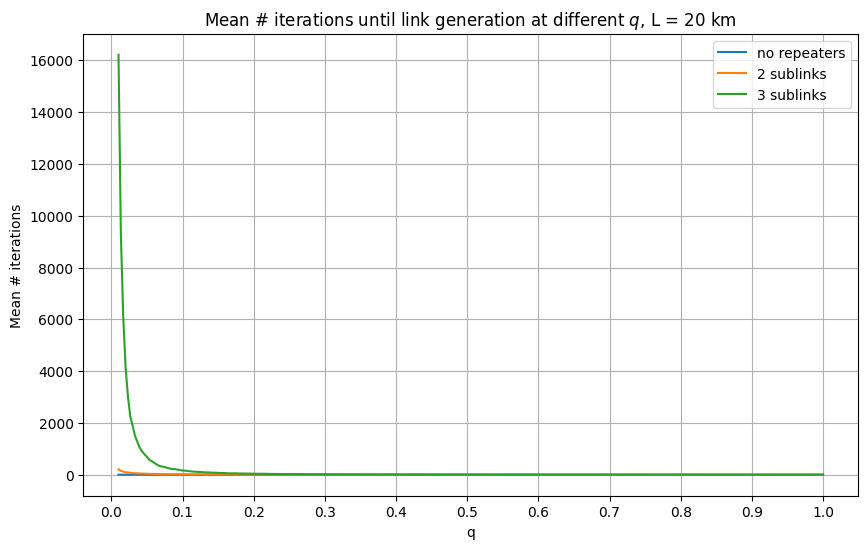

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(q_values, q_mean_1subl, label='no repeaters')
plt.plot(q_values, q_mean_2subl, label='2 sublinks')
plt.plot(q_values, q_mean_3subl, label='3 sublinks')
plt.xticks([_*0.1 for _ in range(11)])
plt.xlabel('q')
plt.ylabel('Mean # iterations')
plt.grid(True)
plt.legend()
plt.title(f'Mean # iterations until link generation at different $q$, L = {L} km')
plt.show()

### N=2,3; varying x with different q

In [ ]:
L_values_2 = range(1,150+1)

dict_Q_2sl = {}

for Q in np.arange(0.1, 1.1, 0.1):
    #print(Q)
    dict_Q_2sl[Q] = [np.mean(it_SaE_naive(i=1000,n=2,p=np.exp(-k*L/2),q=Q)) for L in L_values_2]

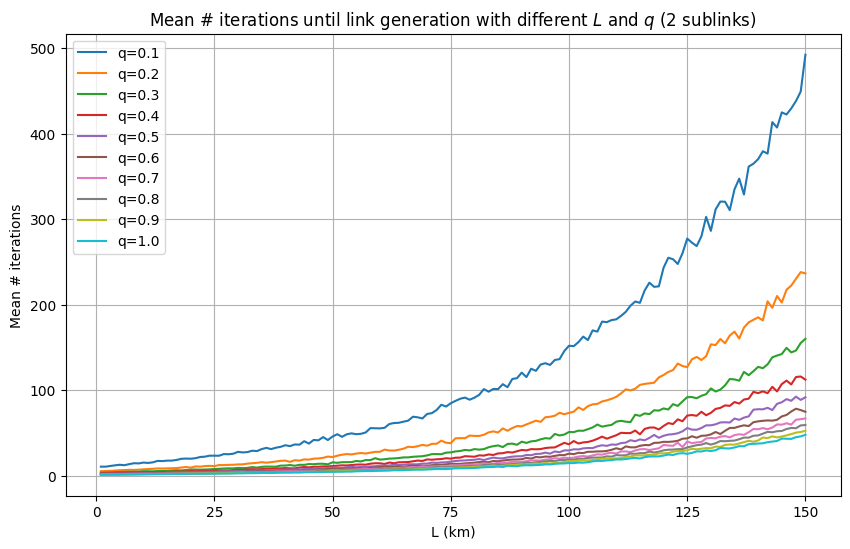

In [ ]:
plt.figure(figsize=(10, 6))
for key in dict_Q_2sl:
    plt.plot(L_values_2, dict_Q_2sl[key], label=f'q={round(key, 1)}')
plt.xticks([_*25 for _ in range(7)])
plt.xlabel('L (km)')
plt.ylabel('Mean # iterations')
plt.grid(True)

plt.title('Mean # iterations until link generation with different $L$ and $q$ (2 sublinks)')
plt.legend()
plt.show()


In [ ]:
x_values_3 = range(1,101)

dict_Q_3sl = {}

for Q in np.arange(0.1, 1.1, 0.1):
    dict_Q_3sl[Q] = [np.mean(it_SaE_naive(i=1000,n=3,p=np.exp(-k*x/3),q=Q)) for x in x_values_3]

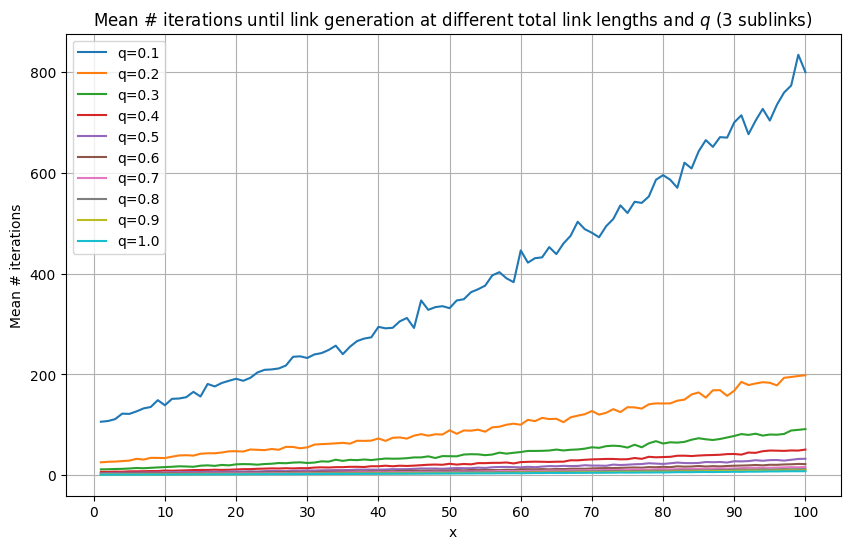

In [ ]:
plt.figure(figsize=(10, 6))
for key in dict_Q_3sl:
    plt.plot(x_values_3, dict_Q_3sl[key], label=f'q={round(key, 1)}')
    plt.xticks([_*10 for _ in range(11)])
plt.xlabel('x')
plt.ylabel('Mean # iterations')
plt.grid(True)

plt.title('Mean # iterations until link generation at different total link lengths and $q$ (3 sublinks)')
plt.legend()
plt.show()


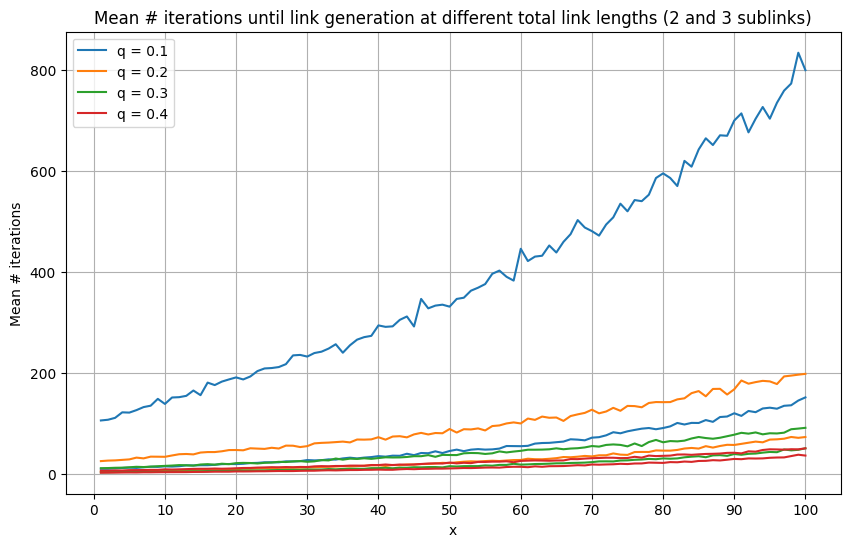

In [ ]:
plt.figure(figsize=(10, 6))
for key in list(dict_Q_2sl.keys())[:4]:
    plt.plot(x_values_3, dict_Q_2sl[key][:100], label=f'q = {round(key,1)}')
for _ in range(6):
    plt.plot([],[])
for key in list(dict_Q_3sl.keys())[:4]:
    plt.plot(x_values_3, dict_Q_3sl[key])
plt.xticks([_*10 for _ in range(11)])
plt.xlabel('x')
plt.ylabel('Mean # iterations')
plt.grid(True)
plt.title('Mean # iterations until link generation at different total link lengths (2 and 3 sublinks)')
plt.legend()
plt.show()

## Heatmap generation

In [694]:
def prob_all_SaE(N,p,q,max_iter):
    shortest_sl = [(i,i+1) for i in range(N)]
    truth_vals = {(i,i+1):False for i in range(N)}
    truth_vals[(0,N)] = False
    counter = 0


    while True:
        counter += 1

        existing_links = sorted([link for link in truth_vals if truth_vals[link]])
        for link in shortest_sl:
            big_link_exists = False
            if not truth_vals[link]:
                for big_link in existing_links:
                    if big_link[0]<=link[0] and link[-1]<=big_link[-1]:
                        big_link_exists = True
                        break
                if big_link_exists:
                    continue   

                if random.random() < p:
                    truth_vals[link] = True
        
        existing_links = sorted([link for link in truth_vals if truth_vals[link]])

        temp_rep = 0
        all_linked = False
        while temp_rep != N:
            valid_links = [link for link in existing_links if link[0]==temp_rep]
            if len(valid_links) > 0:
                temp_rep = valid_links[0][-1]
            elif len(valid_links) == 0:
                all_linked = False
                break
        if temp_rep == N:
            all_linked = True
            #print('------------------')
            #print('link complete, attempting swapping...')

        if all_linked:
            for rep in range(1,N):
                #print('existing sublinks:', sorted([_ for _ in truth_vals if truth_vals[_]]))
                sl_L = None
                sl_R = None
                for link in truth_vals:
                    if truth_vals[link]:
                        if rep == link[-1]:
                            sl_L = link
                        if rep == link[0]:
                            sl_R = link

                #print(f'swapping on {rep}; L:{sl_L}, R:{sl_R}')

                if sl_L != None and sl_R != None:
                    if random.random() < q: # succeed -> entanglement 
                        #print(f'{sl_L[0]}--{sl_R[-1]} succeed')
                        truth_vals[(sl_L[0],sl_R[-1])] = True
                        truth_vals[sl_L] = False
                        truth_vals[sl_R] = False
                    else: # fail
                        #print(f'{sl_L[0]}--{sl_R[-1]} fails')
                        truth_vals[sl_L] = False
                        truth_vals[sl_R] = False
                else:
                    pass
                    #print('swapping invalid') 
        
        if truth_vals[(0,N)]:
            #print(f'complete in {counter} iterations')
            return counter
        
        # stop if iter > ...
        elif counter >= max_iter:
            return counter

                

def iter_SaE(i,N,L,q,max_iter):
    l = []
    for i in range(i):
        l.append(prob_all_SaE(N=N,p=np.exp(-k*L/N),q=q,max_iter=max_iter))

        # if first iterations all capped, just return it
        if len(l) == 20:
            if set(l) == set([max_iter]):
                return l
    
    return l



### L<200, per 1km

In [289]:
for L__ in range(1,200+1):
    for q__ in np.arange(0.025, 1.025, 0.025):
        q__ = round(q__,3)
        for N__ in range(1,10+1):
            if (L__,q__,N__) not in heatmap_dict:
                if q__ == 1:
                    heatmap_dict[(L__,q__,N__)] = [exp_subl(L__,N__)]
                else:
                    heatmap_dict[(L__,q__,N__)] = iter_SaE(i=50,N=N__,L=L__,q=q__)
                
                clear_output(wait=True)
                print(f'({L__},{q__},{N__}) complete')

(200,0.975,10) complete


In [343]:
heatmap_dict = {key:heatmap_dict[key] for key in sorted(heatmap_dict.keys())}

filepath_LqN_iter = f'data\\LqN\\LqN200.txt'
with open(filepath_LqN_iter, 'w') as file:
        for key in heatmap_dict:
            file.write(f'{key}: {heatmap_dict[key]}'+'\n')
        

In [292]:
heatmap_dict_Lq = {}

for LqN in heatmap_dict:
    L__ = LqN[0]
    q__ = LqN[1]
    N__ = LqN[2]
    if (L__,q__) not in heatmap_dict_Lq:
        heatmap_dict_Lq[(L__,q__)] = {}
    heatmap_dict_Lq[(L__,q__)][N__] = np.mean(heatmap_dict[LqN])


In [293]:
heatmap_dict_Lq_min = {}

for key_ in heatmap_dict_Lq:
    heatmap_dict_Lq_min[key_] = min(heatmap_dict_Lq[key_], key=heatmap_dict_Lq[key_].get)

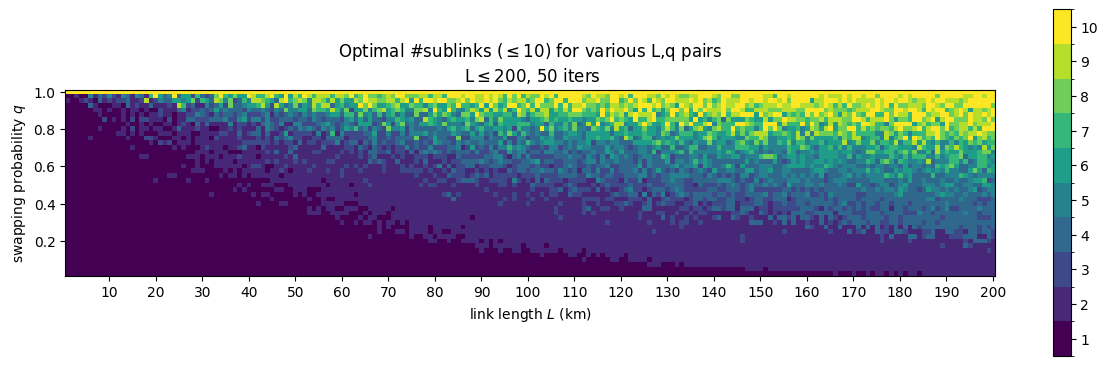

In [678]:
# Extract unique x and y values
x_values = sorted(set(kay[1] for kay in heatmap_dict_Lq_min.keys()))  
y_values = sorted(set(kay[0] for kay in heatmap_dict_Lq_min.keys()))  

heatmap_data = np.zeros((len(x_values), len(y_values)))  # Adjust shape based on swapped axes

# Fill the grid with values from the dictionary
for (y,x), value in heatmap_dict_Lq_min.items():
    x_index = x_values.index(x)
    y_index = y_values.index(y)
    heatmap_data[x_index, y_index] = value

plt.figure(figsize=(15,15))

# Create the heatmap with a discrete color map
bounds = np.arange(1, 12)  # Discrete boundaries from 1 to 11 to include midpoints
cmap = plt.get_cmap('viridis', len(bounds) - 1)  # Use a colormap with discrete intervals
norm = mcolors.BoundaryNorm(bounds, cmap.N)

plt.imshow(heatmap_data, origin='lower', cmap=cmap, norm=norm)

# Set custom ticks and labels for the axes
plt.xticks(range(9, len(y_values), 10), range(10, len(y_values)+1, 10))
plt.yticks(range(7, 40, 8), [round(r, 1) for r in np.arange(0.2, 1.2, 0.2)])

plt.xlabel('link length $L$ (km)') 
plt.ylabel('swapping probability $q$') 
plt.title('Optimal #sublinks ($\leq10$) for various L,q pairs \n L$\leq200$, 50 iters')

# Show the discrete colorbar
cbar = plt.colorbar(shrink=0.3)

# Calculate tick positions centered between boundaries
tick_positions = (bounds[:-1] + bounds[1:]) / 2
cbar.set_ticks(tick_positions)  # Set centered ticks
cbar.set_ticklabels(np.arange(1, 11))  # Set labels from 1 to 10

plt.show()

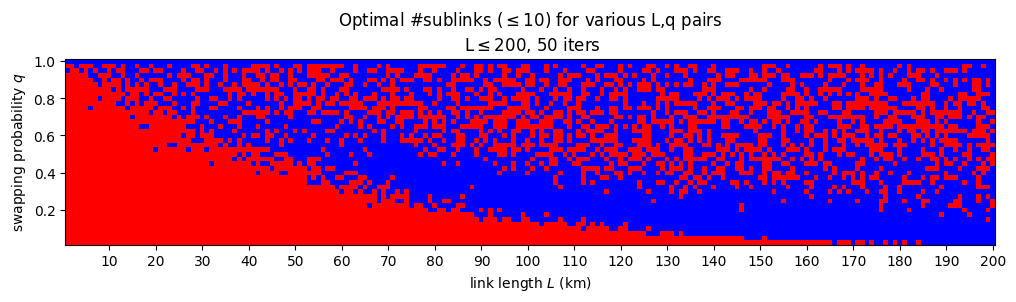

In [719]:
# Extract unique x and y values
x_values = sorted(set(kay[1] for kay in heatmap_dict_Lq_min.keys()))  
y_values = sorted(set(kay[0] for kay in heatmap_dict_Lq_min.keys()))  

heatmap_data = np.zeros((len(x_values), len(y_values)))  # Adjust shape based on swapped axes

# Fill the grid with values from the dictionary
for (y,x), value in heatmap_dict_Lq_min.items():
    x_index = x_values.index(x)
    y_index = y_values.index(y)
    heatmap_data[x_index, y_index] = value

plt.figure(figsize=(12,12))

#Define a custom colormap for odd/even numbers
colors = ['blue', 'red']  # Blue for even, Red for odd
cmap = mcolors.ListedColormap(colors)

# Create a normalization that maps even numbers to 0 and odd numbers to 1
norm = mcolors.BoundaryNorm([0, 1, 2], cmap.N)

# Create the heatmap using the custom colormap
plt.imshow(heatmap_data % 2, origin='lower', cmap=cmap, norm=norm)


# Set custom ticks and labels for the axes
plt.xticks(range(9, len(y_values), 10), range(10, len(y_values)+1, 10))
plt.yticks(range(7, 40, 8), [round(r, 1) for r in np.arange(0.2, 1.2, 0.2)])

plt.xlabel('link length $L$ (km)') 
plt.ylabel('swapping probability $q$') 
plt.title('Optimal #sublinks ($\leq10$) for various L,q pairs \n L$\leq200$, 50 iters')

plt.show()

### L<2500, per 10km

In [755]:
# manual removal
for kkk in heatmap_dict_big.copy():
    if kkk[1] <= 0.25 and kkk[0] >= 210:
        del heatmap_dict_big[kkk]
        continue

In [798]:
for L__ in range(10,1000+10,10):

    for q__ in np.arange(0.05, 1.05, 0.05):
        q__ = round(q__,3)

        for N__ in range(1,30+1):
            # at longer lengths, direct link is never optimal
            if L__>200 and N__ == 1:
                continue

            elif q__<=0.6 and N__>20:
                continue

            elif q__<=0.4 and N__>15:
                continue

            elif q__<=0.2 and N__>10:
                continue
            
            elif q__==0.05 and N__>8:
                continue

            #skip 0.05 for now
            elif q__==0.05:
                continue
            
            # check if prev asc.
            # if previous 4 values increasing, terminate
            if (L__,q__,N__-4) in heatmap_dict_big.keys():
                prev4_l = [np.mean(heatmap_dict_big[(L__,q__,enn)]) for enn in (N__-4,N__-3,N__-2,N__-1)]
                if sorted(prev4_l) == prev4_l and len(set(prev4_l))==4:
                    break


            if (L__,q__,N__) not in heatmap_dict_big:

                print(f'generating on ({L__},{q__},{N__})')

                if q__ == 1:
                    heatmap_dict_big[(L__,q__,N__)] = [exp_subl(L__,N__)]
                elif q__ == 0.1 and L__ >= 600:
                    heatmap_dict_big[(L__,q__,N__)] = iter_SaE(i=30,N=N__,L=L__,q=q__,max_iter=5000000)
                elif q__ == 0.05:
                    heatmap_dict_big[(L__,q__,N__)] = iter_SaE(i=30,N=N__,L=L__,q=q__,max_iter=1000000)
                else:
                    heatmap_dict_big[(L__,q__,N__)] = iter_SaE(i=30,N=N__,L=L__,q=q__,max_iter=1000000)
                    
                
                clear_output(wait=True)
                print(f'({L__},{q__},{N__}) complete')

                if keyboard.is_pressed('s'): # hold s to end at next iter
                    raise KeyboardInterrupt
             
            # if iterations <1k, 100 iter
            if np.mean(heatmap_dict_big[(L__,q__,N__)]) <= 1000 and len(heatmap_dict_big[(L__,q__,N__)])==30 and q__!=1:
                temp_l = iter_SaE(i=70,N=N__,L=L__,q=q__,max_iter=100000)
                heatmap_dict_big[(L__,q__,N__)] = heatmap_dict_big[(L__,q__,N__)].copy() + temp_l
                clear_output(wait=True)
                print(f'({L__},{q__},{N__}) expanded')

                if keyboard.is_pressed('s'): # hold s to end at next iter
                    raise KeyboardInterrupt

(770,0.2,8) complete
generating on (770,0.2,9)


In [792]:
heatmap_dict_big = {key:heatmap_dict_big[key] for key in sorted(heatmap_dict_big.keys())}

filepath_LqN_big_iter = f'data\\LqN\\LqN2500.txt'
with open(filepath_LqN_big_iter, 'w') as file:
        for key_ in heatmap_dict_big:
            file.write(f'{key_}: {heatmap_dict_big[key_]}'+'\n')

In [793]:
heatmap_dict_big_Lq = {}

for LqN in heatmap_dict_big:
    L__ = LqN[0]
    q__ = LqN[1]
    N__ = LqN[2]
    if (L__,q__) not in heatmap_dict_big_Lq:
        heatmap_dict_big_Lq[(L__,q__)] = {}
    heatmap_dict_big_Lq[(L__,q__)][N__] = np.mean(heatmap_dict_big[LqN])

heatmap_dict_big_Lq_min = {}

for key_ in heatmap_dict_big_Lq:
    heatmap_dict_big_Lq_min[key_] = min(heatmap_dict_big_Lq[key_], key=heatmap_dict_big_Lq[key_].get)

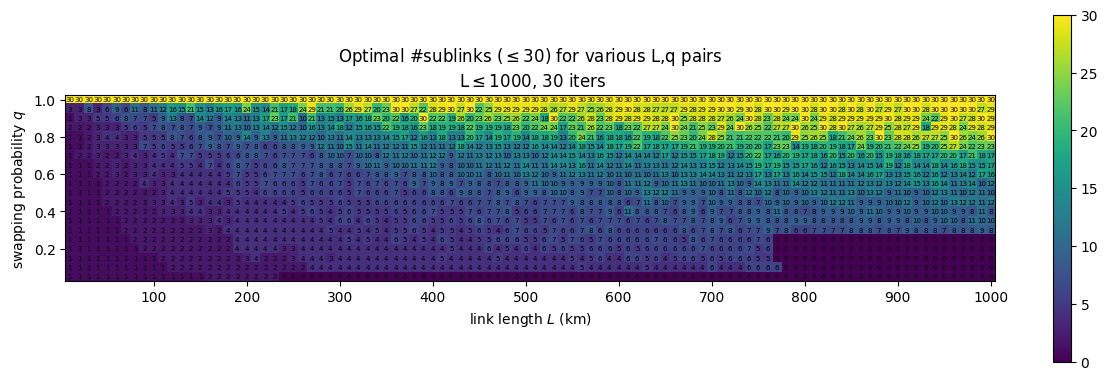

In [797]:
# Extract unique x and y values
x_values = sorted(set(kay[1] for kay in heatmap_dict_big_Lq_min.keys()))  
y_values = sorted(set(kay[0] for kay in heatmap_dict_big_Lq_min.keys()))  

heatmap_data = np.zeros((len(x_values), len(y_values)))

# Fill the grid with values from the dictionary
for (y,x), value in heatmap_dict_big_Lq_min.items():
    x_index = x_values.index(x)  
    y_index = y_values.index(y)  
    heatmap_data[x_index, y_index] = value  # Adjusted to match swapped axes

plt.figure(figsize=(15,15))

cmap = plt.get_cmap('viridis')

plt.imshow(heatmap_data, origin='lower',cmap=cmap)#, norm=norm)

# Set custom ticks and labels for the axes
plt.xticks(range(10-1, len(y_values), 10), range(100, len(y_values)*10+1, 100))
plt.yticks(range(3, 20, 4), [round(r, 1) for r in np.arange(0.2, 1.2, 0.2)])

plt.xlabel('link length $L$ (km)') 
plt.ylabel('swapping probability $q$') 
plt.title('Optimal #sublinks ($\leq30$) for various L,q pairs \n L$\leq1000$, 30 iters')

# Show the discrete colorbar
cbar = plt.colorbar(shrink=0.3)

num_disp = True
if num_disp:
    for (j,i),label in np.ndenumerate(heatmap_data):
        plt.text(i,j,round(label),ha='center',va='center',fontsize=5)

plt.show()

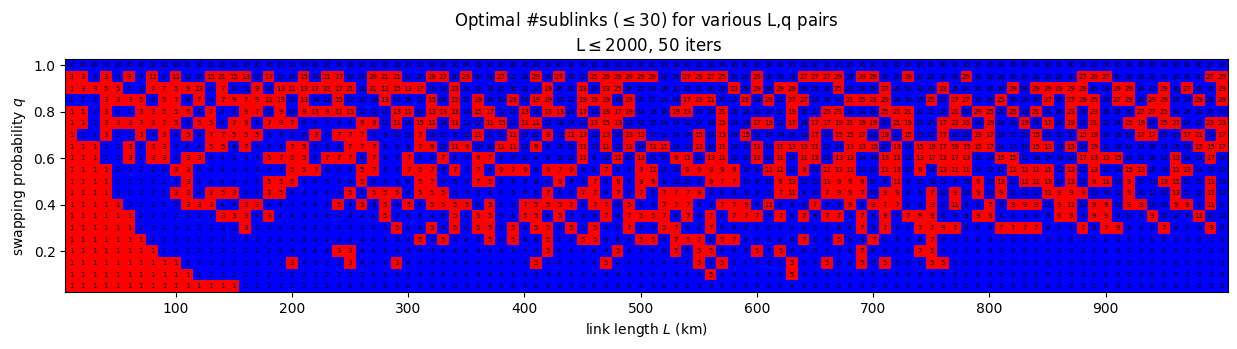

In [795]:
# Extract unique x and y values
x_values = sorted(set(kay[1] for kay in heatmap_dict_big_Lq_min.keys()))  
y_values = sorted(set(kay[0] for kay in heatmap_dict_big_Lq_min.keys()))  

heatmap_data = np.zeros((len(x_values), len(y_values))) 

# Fill the grid with values from the dictionary
for (y,x), value in heatmap_dict_big_Lq_min.items():
    x_index = x_values.index(x)  
    y_index = y_values.index(y)  
    heatmap_data[x_index, y_index] = value  # Adjusted to match swapped axes

plt.figure(figsize=(15,15))

# Define a custom colormap for odd/even numbers
colors = ['blue', 'red']  # Blue for even, Red for odd
cmap = mcolors.ListedColormap(colors)

# Create a normalization that maps even numbers to 0 and odd numbers to 1
norm = mcolors.BoundaryNorm([0, 1, 2], cmap.N)

# Create the heatmap using the custom colormap
plt.imshow(heatmap_data % 2, origin='lower', cmap=cmap, norm=norm)

# Set custom ticks and labels for the axes
plt.xticks(range(10-1, len(y_values)-1, 10), range(100, len(y_values)*10, 100))
plt.yticks(range(3, 20, 4), [round(r, 1) for r in np.arange(0.2, 1.2, 0.2)])

plt.xlabel('link length $L$ (km)') 
plt.ylabel('swapping probability $q$') 
plt.title('Optimal #sublinks ($\leq30$) for various L,q pairs \n L$\leq2000$, 50 iters')

num_disp = True
if num_disp:
    for (j,i),label in np.ndenumerate(heatmap_data):
        plt.text(i,j,round(label),ha='center',va='center',fontsize=5)
# Calculate tick positions centered between boundaries
#tick_positions = (bounds[:-1] + bounds[1:]) / 2
#cbar.set_ticks(tick_positions)  # Set centered ticks
#cbar.set_ticklabels(np.arange(1 , 30+1))  

plt.show()